## import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

# 데이터 불러오기

In [4]:
df = pd.read_pickle('./WHtR_concat/01/reduction_03.pkl')
df.head(2)

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57903 entries, 0 to 57902
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   57903 non-null  int64  
 1   체중(5Kg 단위)  57903 non-null  int64  
 2   허리둘레        57903 non-null  float64
 3   시력(좌)       57903 non-null  float64
 4   시력(우)       57903 non-null  float64
 5   수축기 혈압      57903 non-null  float64
 6   이완기 혈압      57903 non-null  float64
 7   식전혈당(공복혈당)  57903 non-null  float64
 8   혈청크레아티닌     57903 non-null  float64
 9   (혈청지오티)AST  57903 non-null  float64
 10  (혈청지오티)ALT  57903 non-null  float64
 11  감마 지티피      57903 non-null  float64
 12  흡연상태        57903 non-null  float64
 13  음주여부        57903 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 6.2 MB


In [15]:
df1 = df.rename(columns=dict(zip(df.columns, 'HEIGHT WEIGHT WAIST EYE_L EYE_R SBP DBP GLUCOSE CREATININE AST ALT r_GTP SMOKING DRINK'.split(' '))))

In [16]:
df1.head(2)

,HEIGHT,WEIGHT,WAIST,EYE_L,EYE_R,SBP,DBP,GLUCOSE,CREATININE,AST,ALT,r_GTP,SMOKING,DRINK
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0


In [17]:
df2 = df1.drop(columns='EYE_L EYE_R CREATININE AST ALT r_GTP'.split(' '))

In [18]:
df2.head(2)

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK
0,165,60,72.1,127.0,79.0,90.0,1.0,0.0
1,185,85,94.0,114.0,72.0,86.0,3.0,1.0


# GLUCOSE 분포

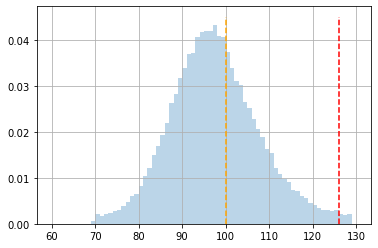

In [34]:
df2.GLUCOSE.hist(range=(60, 130), bins=70, alpha=0.3, density=True)
plt.vlines(100, 0, 0.045, color='orange', ls='--')
plt.vlines(126, 0, 0.045, color='red', ls='--')

plt.show()

#### -> 위 그래프 영역 색칠로, 병무청 데이터로 보여주기, 나이별로 정리

# GLU_CAT 컬럼 만들기
- 0/1/2
- GLUCOSE \~99/ 100 \~125/ 126\~

In [36]:
df3 = df2.copy()

In [66]:
total = df3.GLUCOSE.count()
total

57903

In [68]:
(df3.GLUCOSE < 100).sum(), ((df3.GLUCOSE < 100).sum()/total*100).round(1)

(36159, 62.4)

In [69]:
((100 <= df3.GLUCOSE) & (df3.GLUCOSE < 125)).sum(), (((100 <= df3.GLUCOSE) & (df3.GLUCOSE < 125)).sum()/total*100).round(1)

(21220, 36.6)

In [70]:
(126 <= df3.GLUCOSE ).sum(), ((126 <= df3.GLUCOSE ).sum()/total*100).round(1)

(350, 0.6)

In [51]:
df3['GLU_CAT'] = np.nan

In [49]:
idx = df3[df3.GLUCOSE < 100].index

In [56]:
df3.loc[idx, 'GLU_CAT'] = 0

In [57]:
idx = df3[(100 <= df3.GLUCOSE) & (df3.GLUCOSE < 125)].index

In [58]:
df3.loc[idx, 'GLU_CAT'] = 1

In [60]:
idx = df3[126 <= df3.GLUCOSE].index

In [61]:
df3.loc[idx, 'GLU_CAT'] = 2

In [62]:
df3.GLU_CAT.value_counts()

0.0    36159
1.0    21220
2.0      350
Name: GLU_CAT, dtype: int64

# BMI 컬럼추가

In [73]:
df4 = df3.copy()

In [78]:
df4['BMI'] = (df4.WEIGHT/(df4.HEIGHT/100)).round(1)
df4.head(3)

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK,GLU_CAT,BMI
0,165,60,72.1,127.0,79.0,90.0,1.0,0.0,0.0,36.4
1,185,85,94.0,114.0,72.0,86.0,3.0,1.0,0.0,45.9
2,165,55,77.5,130.0,70.0,87.0,1.0,0.0,0.0,33.3


# WHtR 컬럼 추가

In [181]:
df5 = df4.copy()

In [182]:
df5.head(3)

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK,GLU_CAT,BMI
0,165,60,72.1,127.0,79.0,90.0,1.0,0.0,0.0,36.4
1,185,85,94.0,114.0,72.0,86.0,3.0,1.0,0.0,45.9
2,165,55,77.5,130.0,70.0,87.0,1.0,0.0,0.0,33.3


In [183]:
df5['WHtR'] = (df5.WAIST/df5.HEIGHT).round(3)

In [184]:
df5.head(3)

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK,GLU_CAT,BMI,WHtR
0,165,60,72.1,127.0,79.0,90.0,1.0,0.0,0.0,36.4,0.437
1,185,85,94.0,114.0,72.0,86.0,3.0,1.0,0.0,45.9,0.508
2,165,55,77.5,130.0,70.0,87.0,1.0,0.0,0.0,33.3,0.470


# 당뇨 단계별 분석

In [185]:
g1 = df5.groupby(by='GLU_CAT')

In [186]:
g1.mean()

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK,BMI,WHtR
GLU_CAT,,,,,,,,,,
0.0,171.199425,71.981111,84.449169,121.626262,76.991040,90.825327,2.079869,0.836500,42.005631,0.493560
1.0,171.333883,74.579406,86.269279,124.238077,78.914703,106.909048,2.137182,0.866211,43.488247,0.503803
2.0,171.200000,76.142857,87.447429,125.640000,79.940000,127.005714,2.254286,0.871429,44.440000,0.511140


## 단계별 WHtR 분포

In [187]:
rng, bns = (0.35, 0.7), 35
li_color = ['b', 'orange', 'r']

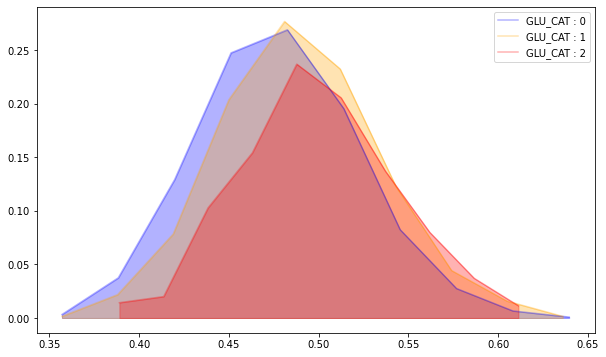

In [188]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i in range(0, 3):
    y, x = np.histogram(g1.get_group(i)['WHtR'])
    ax.plot(x[:-1], y/y.sum(), label=f'GLU_CAT : {i}', color=li_color[i], alpha=0.3)
    ax.fill_between(x[:-1], 0, y/y.sum(), color=li_color[i], alpha=0.3)
    ax.legend()

plt.show()

- 보기 안좋은 모양새

# 컬럼별 분석

In [189]:
df5.head(1)

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK,GLU_CAT,BMI,WHtR
0,165,60,72.1,127.0,79.0,90.0,1.0,0.0,0.0,36.4,0.437


## WHtR

<AxesSubplot:>

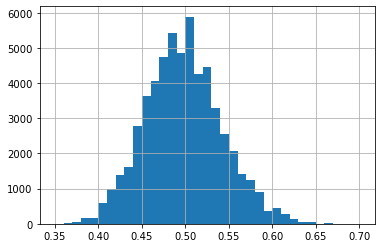

In [190]:
df5.WHtR.hist(range=(0.35, 0.7), bins=35)

In [191]:
li_whtr = []

In [192]:
for i in range(0, 101, 10):
    li_whtr.append(np.percentile(df5.WHtR, i))

In [193]:
len(li_whtr), li_whtr

(11,
 [0.357, 0.442, 0.461, 0.474, 0.485, 0.496, 0.506, 0.519, 0.533, 0.555, 0.671])

### WHtR_CAT 컬럼 추가

In [194]:
df6 = df5.copy()

In [195]:
for i, whtr in enumerate(li_whtr):
    print(i, ':', whtr)

0 : 0.357
1 : 0.442
2 : 0.461
3 : 0.474
4 : 0.485
5 : 0.496
6 : 0.506
7 : 0.519
8 : 0.533
9 : 0.555
10 : 0.671


In [201]:
def cat_whtr(x):
    for i, whtr in enumerate(li_whtr[1:-1]):
        if x < whtr:
            return i
    return i+1

In [202]:
df6.WHtR.apply(lambda x: cat_whtr(x)).value_counts()

6    6803
4    6233
8    6219
9    5808
2    5806
1    5787
0    5707
7    5538
3    5341
5    4661
Name: WHtR, dtype: int64

In [206]:
df6.WHtR.apply(lambda x: cat_whtr(x)).isna().sum()

0

In [207]:
df6['WHtR_CAT'] = df6.WHtR.apply(lambda x: cat_whtr(x))

In [211]:
df6.head(5)

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK,GLU_CAT,BMI,WHtR,WHtR_CAT
0,165,60,72.1,127.0,79.0,90.0,1.0,0.0,0.0,36.4,0.437,0
1,185,85,94.0,114.0,72.0,86.0,3.0,1.0,0.0,45.9,0.508,6
2,165,55,77.5,130.0,70.0,87.0,1.0,0.0,0.0,33.3,0.470,2
3,165,75,84.0,139.0,80.0,92.0,2.0,1.0,0.0,45.5,0.509,6
4,175,70,83.0,110.0,70.0,120.0,3.0,1.0,1.0,40.0,0.474,3


### WHtR_CAT 그룹별 값 확인

In [213]:
g2 = df6.groupby(by='WHtR_CAT')

In [217]:
glu_p_whtr = g2.mean()[['GLUCOSE']]

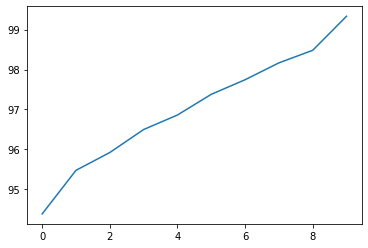

In [218]:
plt.plot(glu_p_whtr.index, glu_p_whtr.values)

In [223]:
g2.describe().GLUCOSE

,count,mean,std,min,25%,50%,75%,max
WHtR_CAT,,,,,,,,
0,5707.0,94.377256,9.741603,69.0,88.0,94.0,100.0,128.0
1,5787.0,95.470710,9.816954,69.0,89.0,95.0,101.0,128.0
2,5806.0,95.917499,9.916373,69.0,89.0,95.0,102.0,128.0
3,5341.0,96.494102,9.852062,69.0,90.0,96.0,102.0,128.0
4,6233.0,96.858174,9.936033,69.0,90.0,96.0,103.0,128.0
5,4661.0,97.377601,10.059239,69.0,91.0,97.0,104.0,128.0
6,6803.0,97.743496,10.291313,69.0,91.0,97.0,104.0,128.0
7,5538.0,98.166486,10.352349,69.0,91.0,98.0,105.0,128.0
8,6219.0,98.481910,10.301507,69.0,92.0,98.0,105.0,128.0


### WHtR_CAT2 컬럼 추가

In [225]:
df7 = df6.copy()

In [224]:
li_wcat = [0.43, 0.531, 0.58] # 저체중/ 정상/ 과체중/ 비만

In [226]:
def cat_whtr2(x):
    for i, whtr in enumerate(li_wcat):
        if x < whtr:
            return i
    return i+1

In [229]:
df7.WHtR.apply(lambda x : cat_whtr2(x)).value_counts()

1    41830
2    10450
0     3378
3     2245
Name: WHtR, dtype: int64

In [231]:
df7['WHtR_CAT2'] = df7.WHtR.apply(lambda x : cat_whtr2(x))

In [232]:
df7.head(2)

,HEIGHT,WEIGHT,WAIST,SBP,DBP,GLUCOSE,SMOKING,DRINK,GLU_CAT,BMI,WHtR,WHtR_CAT,WHtR_CAT2
0,165,60,72.1,127.0,79.0,90.0,1.0,0.0,0.0,36.4,0.437,0,1
1,185,85,94.0,114.0,72.0,86.0,3.0,1.0,0.0,45.9,0.508,6,1


### WHtR_CAT2 그룹별 값 확인

In [233]:
g3 = df7.groupby(by='WHtR_CAT2')

In [234]:
g3.describe().GLUCOSE

,count,mean,std,min,25%,50%,75%,max
WHtR_CAT2,,,,,,,,
0,3378.0,94.191533,9.728154,69.0,88.0,94.0,100.0,128.0
1,41830.0,96.717452,10.064462,69.0,90.0,96.0,103.0,128.0
2,10450.0,98.688038,10.480982,69.0,92.0,98.0,105.0,128.0
3,2245.0,99.690423,10.767554,69.0,92.0,99.0,107.0,128.0


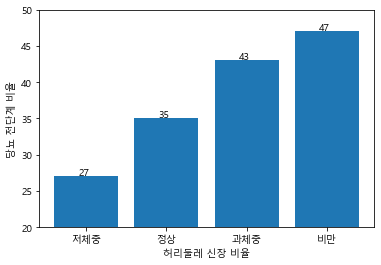

In [336]:
db_stage = 1
li_db_r = []

for whtr_stage in range(0, 4):
    vc = g3.get_group(whtr_stage).GLU_CAT.value_counts()
    p = round(vc[db_stage]/vc.sum()*100)
    li_db_r.append(p)
    
# plt.bar(g3.indices.keys(), li_db_r)
plt.bar('저체중 정상 과체중 비만'.split(' '), li_db_r)
for i in range(4):
    plt.text(i-0.1, li_db_r[i]+0.2, f'{li_db_r[i]}')
plt.ylim(20, 50)
# plt.xticks([0, 1, 2, 3])
plt.xlabel('허리둘레 신장 비율')
plt.ylabel('당뇨 전단계 비율')

plt.show()

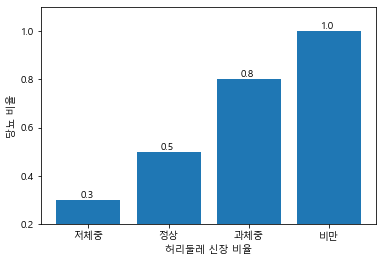

In [346]:
db_stage = 2
li_db_r = []

for whtr_stage in range(0, 4):
    vc = g3.get_group(whtr_stage).GLU_CAT.value_counts()
    p = round(vc[db_stage]/vc.sum(), 3)*100
    li_db_r.append(p)

plt.bar('저체중 정상 과체중 비만'.split(' '), li_db_r)
for i in range(4):
    plt.text(i-0.1, li_db_r[i]+0.01, f'{li_db_r[i]}')
plt.ylim(0.2, 1.1)
# plt.xticks([0, 1, 2, 3])
plt.xlabel('허리둘레 신장 비율')
plt.ylabel('당뇨 비율')

plt.show()

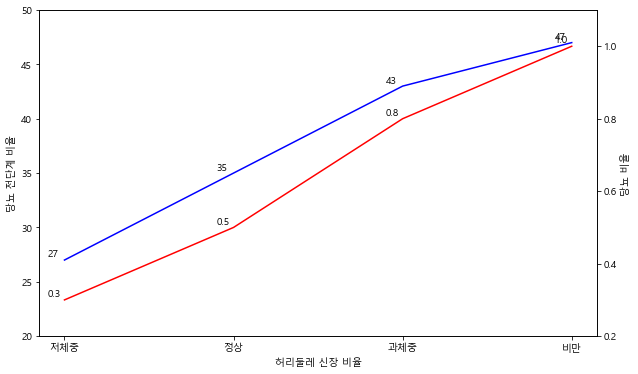

In [351]:
# ====== 전단계 ====== #

db_stage = 1
li_db_r = []
for whtr_stage in range(0, 4):
    vc = g3.get_group(whtr_stage).GLU_CAT.value_counts()
    p = round(vc[db_stage]/vc.sum()*100)
    li_db_r.append(p)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)    
    
ax.plot('저체중 정상 과체중 비만'.split(' '), li_db_r, color='blue')
for i in range(4):
    ax.text(i-0.1, li_db_r[i]+0.3, f'{li_db_r[i]}')
ax.set_ylim(20, 50)

ax.set_xlabel('허리둘레 신장 비율')
ax.set_ylabel('당뇨 전단계 비율')


# ====== 당뇨 ====== #

ax2 = ax.twinx()

db_stage = 2
li_db_r = []

for whtr_stage in range(0, 4):
    vc = g3.get_group(whtr_stage).GLU_CAT.value_counts()
    p = round(vc[db_stage]/vc.sum(), 3)*100
    li_db_r.append(p)

ax2.plot('저체중 정상 과체중 비만'.split(' '), li_db_r, color='red')
for i in range(4):
    ax2.text(i-0.1, li_db_r[i]+0.01, f'{li_db_r[i]}')
ax2.set_ylim(0.2, 1.1)

ax2.set_ylabel('당뇨 비율')

plt.show()

## SMOKING

## DRINK

## 그외